## Appendix B2. Support Vector Machines

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

save_figures = False
figure_path = "../figures/models/"
# df_init = pd.read_parquet("../data/init.parquet")
# df_before = pd.read_parquet("../data/before_split.parquet")
# df_train = pd.read_parquet("../data/prep_train.parquet")
# df_val = pd.read_parquet("../data/prep_val.parquet")
# df_test = pd.read_parquet("../data/prep_test.parquet")
df_tt_train = pd.read_parquet("../data/prep_tt_train.parquet")
df_tt_test = pd.read_parquet("../data/prep_tt_test.parquet")

In [2]:
df_tt_train.head()

,Year_Y2015,Year_Y2016,Country_England,Country_Wales,Supermarket_Asda,Supermarket_Tesco Extra,Supermarket_Tesco Metro,Supermarket_Waitrose,Time_Evening,Time_Morning,...,YearCountryAge_Y2016EnglandAge_g2,YearCountryAge_Y2016EnglandAge_g3,YearCountryAge_Y2016WalesAge_g1,YearCountryAge_Y2016WalesAge_g2,YearCountryAge_Y2016WalesAge_g3,YearCountryAge_nan,ObsSize,FemaleN,MaleN,y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.474255,-1.160118,0.858181,1
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.794531,0.589356,0.858181,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,-1.160118,0.858181,0


In [3]:
X_tt_train = df_tt_train.iloc[:,0:-1].to_numpy()
y_tt_train = df_tt_train["y"].to_numpy()

X_tt_test = df_tt_test.iloc[:,0:-1].to_numpy()
y_tt_test = df_tt_test["y"].to_numpy()

X_tt_train = np.ascontiguousarray(X_tt_train)
y_tt_train = np.ascontiguousarray(y_tt_train)
X_tt_test = np.ascontiguousarray(X_tt_test)
y_tt_test = np.ascontiguousarray(y_tt_test)

### Linear Kernel, Default Parameter

In [4]:
%%time

SVC_lin = SVC(kernel = "linear", 
              class_weight = "balanced", 
              cache_size = 1000, 
              tol = 0.005)
SVC_lin.fit(X_tt_train, y_tt_train)

Wall time: 473 ms


SVC(cache_size=1000, class_weight='balanced', kernel='linear', tol=0.005)

In [5]:
SVC_lin.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 1000,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.005,
 'verbose': False}

In [6]:
y_pred_default = SVC_lin.predict(X_tt_test)

In [7]:
print(balanced_accuracy_score(y_tt_test, y_pred_default))
print(accuracy_score(y_tt_test, y_pred_default))

0.6842384105960264
0.7108753315649867


### Linear Kernel, Grid Search

In [8]:
SVC_lin = SVC(kernel = "linear", 
              class_weight = "balanced", 
              cache_size = 1000, 
              tol = 0.002, 
              max_iter = 100_000)
SVC_lin 

SVC(cache_size=1000, class_weight='balanced', kernel='linear', max_iter=100000,
    tol=0.002)

In [9]:
c_penalty = np.logspace(-3, 2, 11)
params_lin = {'C':c_penalty}

gridCV_lin = GridSearchCV(estimator = SVC_lin, 
                          param_grid = params_lin, 
                          scoring = 'balanced_accuracy', 
                          n_jobs = -2,
                          refit = True, 
                          cv = 5, verbose = 4)
gridCV_lin

GridSearchCV(cv=5,
             estimator=SVC(cache_size=1000, class_weight='balanced',
                           kernel='linear', max_iter=100000, tol=0.002),
             n_jobs=-2,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02])},
             scoring='balanced_accuracy', verbose=4)

In [10]:
%%time 
gridCV_lin.fit(X_tt_train, y_tt_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Wall time: 10.8 s


GridSearchCV(cv=5,
             estimator=SVC(cache_size=1000, class_weight='balanced',
                           kernel='linear', max_iter=100000, tol=0.002),
             n_jobs=-2,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02])},
             scoring='balanced_accuracy', verbose=4)

In [11]:
y_pred_lin = gridCV_lin.predict(X_tt_test)
gridCV_lin.best_params_

{'C': 0.03162277660168379}

In [12]:
print(balanced_accuracy_score(y_tt_test, y_pred_lin))
print(accuracy_score(y_tt_test, y_pred_lin))

0.6957836644591612
0.7374005305039788


### Radial Basis Function Kernel, Grid Search

In [13]:
SVC_rbf = SVC(kernel = "rbf", 
              class_weight = "balanced", 
              cache_size = 1000, 
              tol = 0.002, 
              max_iter = 100_000)
SVC_rbf 

SVC(cache_size=1000, class_weight='balanced', max_iter=100000, tol=0.002)

In [14]:
c_penalty = np.logspace(-3, 2, 6)
gamma_penalty = np.logspace(-2, 2, 17)
params_rbf = {'C':c_penalty, 
              "gamma": gamma_penalty}


gridCV_rbf = GridSearchCV(estimator = SVC_rbf, 
                          param_grid = params_rbf, 
                          scoring = 'balanced_accuracy', 
                          n_jobs = -2,
                          refit = True, 
                          cv = 5, verbose = 4)
gridCV_rbf

GridSearchCV(cv=5,
             estimator=SVC(cache_size=1000, class_weight='balanced',
                           max_iter=100000, tol=0.002),
             n_jobs=-2,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02])},
             scoring='balanced_accuracy', verbose=4)

In [15]:
%%time
gridCV_rbf.fit(X_tt_train, y_tt_train)

Fitting 5 folds for each of 102 candidates, totalling 510 fits
Wall time: 1min 23s


GridSearchCV(cv=5,
             estimator=SVC(cache_size=1000, class_weight='balanced',
                           max_iter=100000, tol=0.002),
             n_jobs=-2,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02])},
             scoring='balanced_accuracy', verbose=4)

In [16]:
y_pred_rbf = gridCV_rbf.predict(X_tt_test)
gridCV_rbf.best_params_

{'C': 1.0, 'gamma': 0.05623413251903491}

In [17]:
print(balanced_accuracy_score(y_tt_test, y_pred_rbf))
print(accuracy_score(y_tt_test, y_pred_rbf))

0.6977041942604856
0.6923076923076923


In [18]:
import json

svc_params = {"lin": gridCV_lin.best_params_,
"rbf": gridCV_rbf.best_params_}

with open("../results/svc_params.json", "w") as outfile:
    json.dump(svc_params, outfile)
    
# with open("logistic.json", "r") as readfile:
#     dict_data = json.load(readfile)

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def custom_confusin_matrix(y_test, y_pred, model_name):
    c_labels = [0, 1] 
    c_disp_labels = ["Not Green", "Green"]

    c_matrix = confusion_matrix(y_test, y_pred,
                                labels = c_labels)
    c_mat_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix,
                                           display_labels = c_disp_labels)

    fig_con, ax_con = plt.subplots()

    c_mat_display.plot(ax = ax_con, cmap = "PuBu")
    ax_con.set_xlabel(ax_con.get_xlabel(), fontsize = 16)
    ax_con.set_ylabel(ax_con.get_ylabel(), fontsize = 16)
    ax_con.set_title(model_name, fontsize = 18)

    text_artists = ax_con.get_children()[0:4]
    for each_text in text_artists:
        each_text.set_fontsize(14)

    ax_con.set_xticks(ax_con.get_xticks())
    ax_con.set_xticklabels(c_disp_labels, fontsize = 14)

    ax_con.set_yticks(ax_con.get_xticks())
    ax_con.set_yticklabels(c_disp_labels, fontsize = 14)

    fig_con.set_size_inches([8, 6])
    
    return fig_con, ax_con


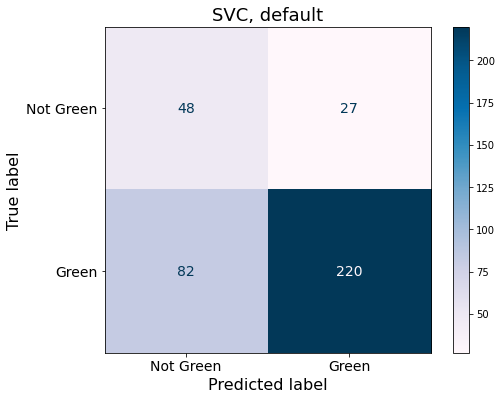

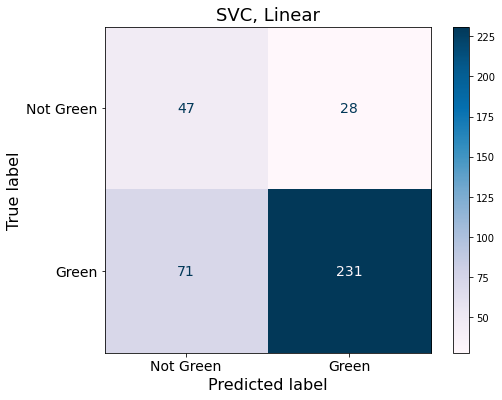

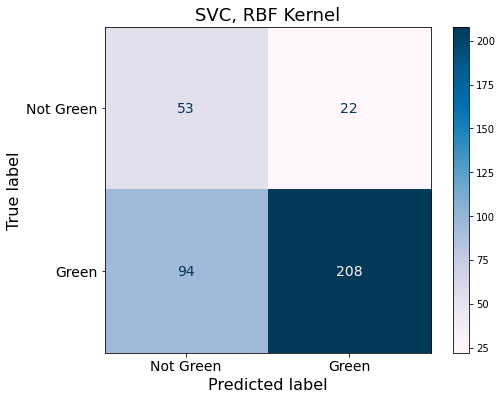

In [20]:
fig_con_de, ax_con_de = custom_confusin_matrix(y_tt_test, y_pred_default, "SVC, default")
fig_con_lin, ax_con_lin = custom_confusin_matrix(y_tt_test, y_pred_lin, "SVC, Linear")
fig_con_rbf, ax_con_rbf = custom_confusin_matrix(y_tt_test, y_pred_rbf, "SVC, RBF Kernel")


cm_figs = [fig_con_de, fig_con_lin, fig_con_rbf]
fig_file_names = ["CM SVC, default", "CM SVC, Linear", "CM SVC, RBF Kernel"]

# save_figures
if save_figures:
    for each_f, each_n in zip(cm_figs, fig_file_names):
        fig_name = f"{figure_path}{each_n}"
        each_f.savefig(f"{fig_name}.pdf", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.png", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.svg", 
                       dpi = 300, 
                        bbox_inches="tight")